In [1]:
%matplotlib inline
import numpy as np
import nengo
import pylab
import struct

In [2]:
def read_file_spike_probe(filename):
    f = open(filename, 'rb')
    data = f.read()
    data_spikes = []
    data_nengo_time = []
    data_clock_time = []
    index = 0
    while index < len(data):
        nengo_time, clock_time, count = struct.unpack('ffI', data[index:index+12])
        try:
            spike_indices = struct.unpack('I'*count, data[index+12:index+12+count*4])
        except:
            break
        data_spikes.append(spike_indices)
        data_nengo_time.append(nengo_time)
        data_clock_time.append(clock_time)
        index += 12+count*4
    f.close()
    return np.array(data_spikes), np.array(data_nengo_time), np.array(data_clock_time)

def read_file_value_probe(filename):
    f = open(filename, 'rb')
    data = f.read()
    count = struct.unpack('I', data[0:4])[0]
    print(count)
    
    data_value = []
    data_nengo_time = []
    data_clock_time = []
    index = 4
    while index < len(data):
        try:
            d = struct.unpack('ff'+'f'*count, data[index:index+8+count*4])
        except:
            break
        nengo_time, clock_time, value = d[0], d[1], d[2:]
        
        data_value.append(value)
        data_nengo_time.append(nengo_time)
        data_clock_time.append(clock_time)
        index += 8+count*4
    f.close()
    return np.array(data_value), np.array(data_nengo_time), np.array(data_clock_time)
     
values_c, nengo_time_v_c, clock_time_v_c = read_file_value_probe('cortex_value')   

2


In [3]:
# input
values_input, nengo_time_v_input, clock_time_v_input = read_file_value_probe('input_stim_value')   

# basal
#spikes_b, nengo_time_d_b, clock_time_d_b = read_file_spike_probe('basal_spike_data')   
values_b, nengo_time_v_b, clock_time_v_b = read_file_value_probe('basal_value')     

# lateral
spikes_l, nengo_time_d_l, clock_time_d_l = read_file_spike_probe('lateral_spike_data')   
values_l, nengo_time_v_l, clock_time_v_l = read_file_value_probe('lateral_value')   

# cortex
# spikes_cortex, nengo_time_d_cortex, clock_time_d_cortex = read_file_spike_probe('cortex_spike_data')   
values_cortex, nengo_time_v_cortex, clock_time_v_cortex = read_file_value_probe('cortex_value')  

# central
spikes_wta0, nengo_time_d_wta0, clock_time_d_wta0 = read_file_spike_probe('central_wta0_spike_data')   
values_wta0, nengo_time_v_wta0, clock_time_v_wta0 = read_file_value_probe('central_wta0_value')  

spikes_wta1, nengo_time_d_wta1, clock_time_d_wta1 = read_file_spike_probe('central_wta1_spike_data')   
values_wta1, nengo_time_v_wta1, clock_time_v_wta1 = read_file_value_probe('central_wta1_value')  

spikes_wta2, nengo_time_d_wta2, clock_time_d_wta2 = read_file_spike_probe('central_wta2_spike_data')   
values_wta2, nengo_time_v_wta2, clock_time_v_wta2 = read_file_value_probe('central_wta2_value')  

1
2
1
2
1
1
1


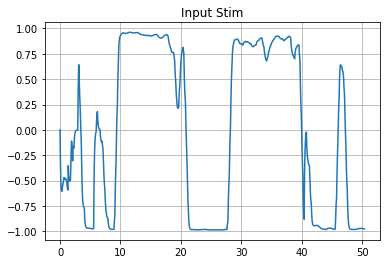

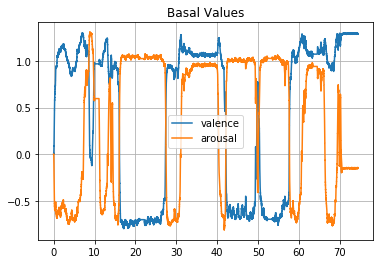

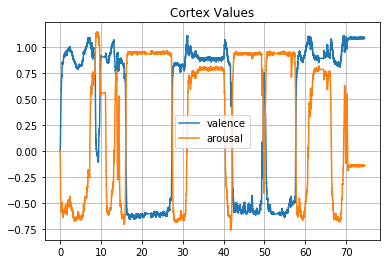

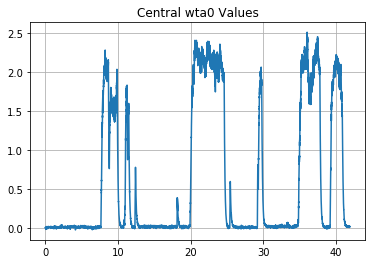

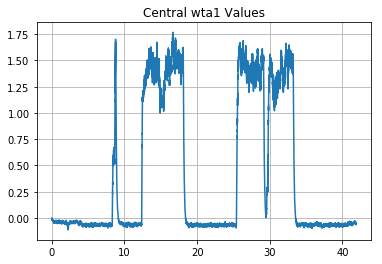

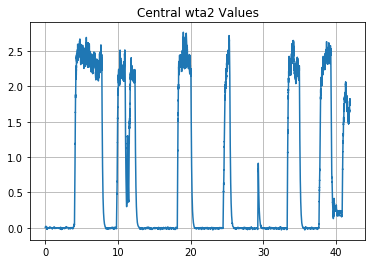

In [11]:
pylab.figure()
pylab.plot(nengo_time_v_input, values_input)
pylab.title('Input Stim')
pylab.grid()

'''
pylab.figure()
pylab.plot(nengo_time_v_l, values_l)
pylab.title('Lateral Values')
pylab.legend(['input'])
'''
pylab.figure()
pylab.plot(nengo_time_v_b, values_b)
pylab.title('Basal Values')
pylab.legend(['valence','arousal'])
pylab.grid()

pylab.figure()
pylab.plot(nengo_time_v_cortex, values_cortex)
pylab.title('Cortex Values')
pylab.legend(['valence','arousal'])
pylab.grid()

pylab.figure()
pylab.plot(nengo_time_v_wta0, values_wta0)
pylab.title('Central wta0 Values')
pylab.grid()

pylab.figure()
pylab.plot(nengo_time_v_wta1, values_wta1)
pylab.title('Central wta1 Values')
pylab.grid()

pylab.figure()
pylab.plot(nengo_time_v_wta2, values_wta2)
pylab.title('Central wta2 Values')
pylab.grid()


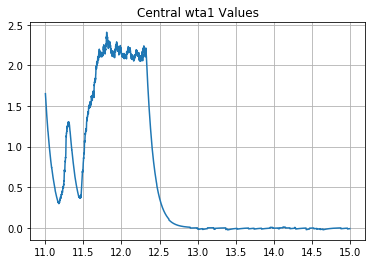

In [15]:
pylab.figure()
pylab.plot(nengo_time_v_wta2[11000:15000], values_wta2[11000:15000])
pylab.title('Central wta1 Values')
pylab.grid()

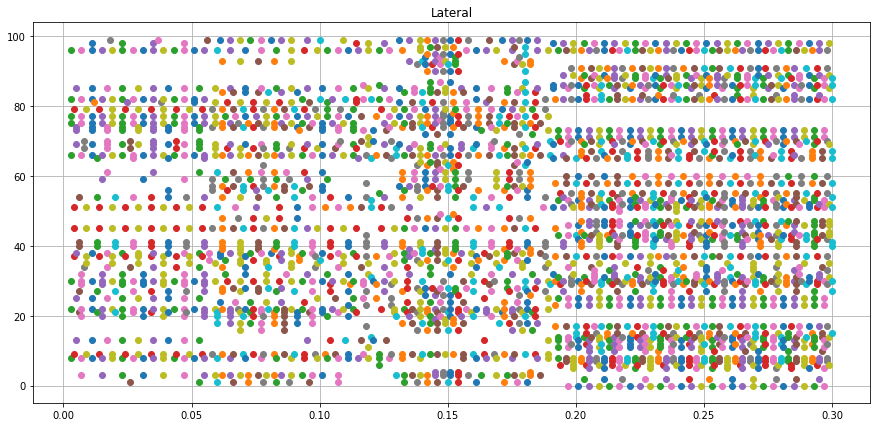

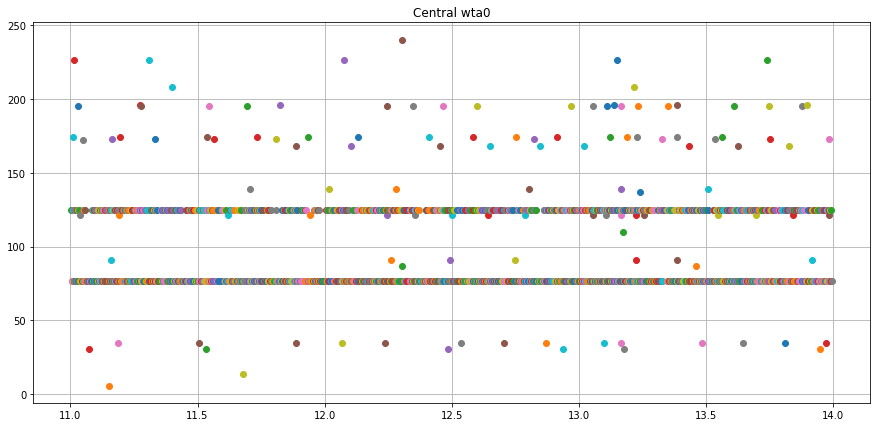

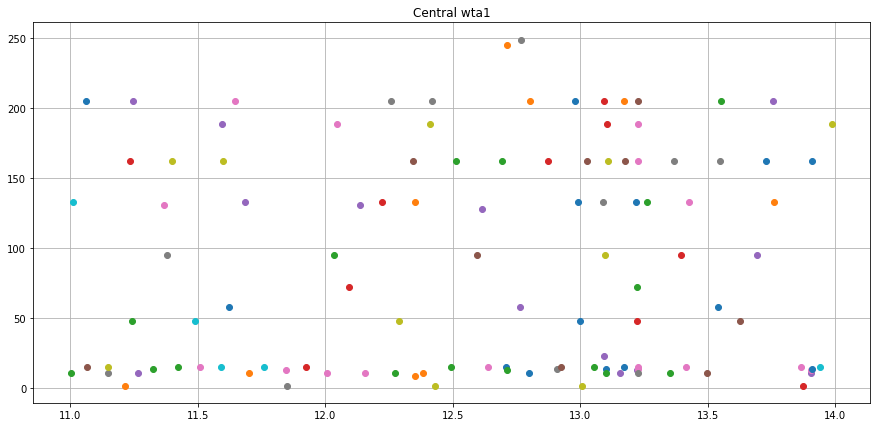

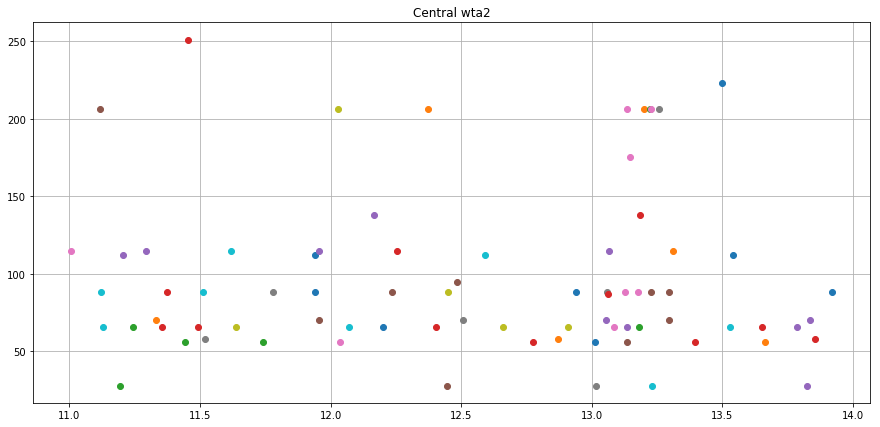

In [12]:
pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_l[:300]):
    spike_indices = spikes_l[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Lateral')
pylab.grid()


# pylab.figure(figsize=(15,7))
# for i, t in enumerate(nengo_time_d_b[:300]):
#     spike_indices = spikes_b[i]
#     pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
# pylab.title('Basal')

# pylab.figure(figsize=(15,7))
# for i, t in enumerate(nengo_time_d_cortex[:300]):
#     spike_indices = spikes_cortex[i]
#     pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
# pylab.title('Cortex')
start = 11000
# central wta0
pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_wta0[start:start+3000]):
    spike_indices = spikes_wta0[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Central wta0')
pylab.grid()


# central wta1
pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_wta1[start:start+3000]):
    spike_indices = spikes_wta1[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Central wta1')
pylab.grid()


# central wta2
pylab.figure(figsize=(15,7))
for i, t in enumerate(nengo_time_d_wta2[start:start+3000]):
    spike_indices = spikes_wta2[i]
    pylab.plot([t]*len(spike_indices), spike_indices, ls='none', marker='o')
pylab.title('Central wta2')
pylab.grid()
